In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
PATH = Path().parent
DDIR = PATH / 'datasets'

In [3]:
df = pd.read_excel(f'{DDIR}/Real estate valuation data set.xlsx')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<p>Dengan data diatas kita mengetahui beberapa hal, diantaranya<br>
1. Kolom No tidak diperlukan, jadi kita bisa menggantinya menjadi index ataupun menghilangkannya.<br>
2. Target pada data ini adalah Price of Unit Area.<br>
3. Saatnya kolom cleaning</p>

In [5]:
df.set_index('No', inplace=True) #menjadikan No sebagai index
#mencari nama nama kolom dan menghilangkan kata pertama
new_column_name = np.array([' '.join(name.split(' ')[1:]) for name in df.columns])
#mengganti nama kolom menjadi nama baru yang bersih
for (col,val),name in zip(df.iteritems(),new_column_name):
    df.rename(columns={f'{col}':name},inplace=True)
    print

In [6]:
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<h2>Data Investigation</h2>
<p>Kita lihat info apa yang ada pada data menggunakan .info()</p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


<p>Bisa kita lihat, bahwa,  <br>
1. Data kita memiliki 7 kolom (features) dengan 2 type yaitu float dan int.<br>
2. Memiliki 414 non-null data dari 414 total data.<br>
Pastikan data benar-benar tidak memiliki null.<br>
</p>

In [8]:
df.isnull().sum()

transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

<p>OK data sudah bersih dan tidak memiliki null value</p>

<h2>Data Exploration</h2>
<p>Kita coba mengeksplor data lebih dalam menggunakan .describe()</p>

In [9]:
df.describe() #karena full data diskrit, tidak perlu menambahkan object

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<p>Ada beberapa insight yang kita bisa dapatkan dengan metode ini.<br>
1. Bisa kita lihat bahwa data kali ini memiliki rentang pada pertengahan 2012 hingga pertengahan 2013.<br>
2. Umur rumah, Jarak stasiun, dan banyaknya toko mungkin dapat memiliki relasi yang sangat kuat terhadap target, mari kita cek.</p>

In [10]:
df.corr(method='pearson') #cek korelasi antar features menggunakan pearson correlation

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<h3>EDA + Visualisasi</h3>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
new_column_name

array(['transaction date', 'house age',
       'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area'], dtype='<U35')

<p>Cari insight dengan memeriksa korelasi antardata menggunakan visualisasi</p>

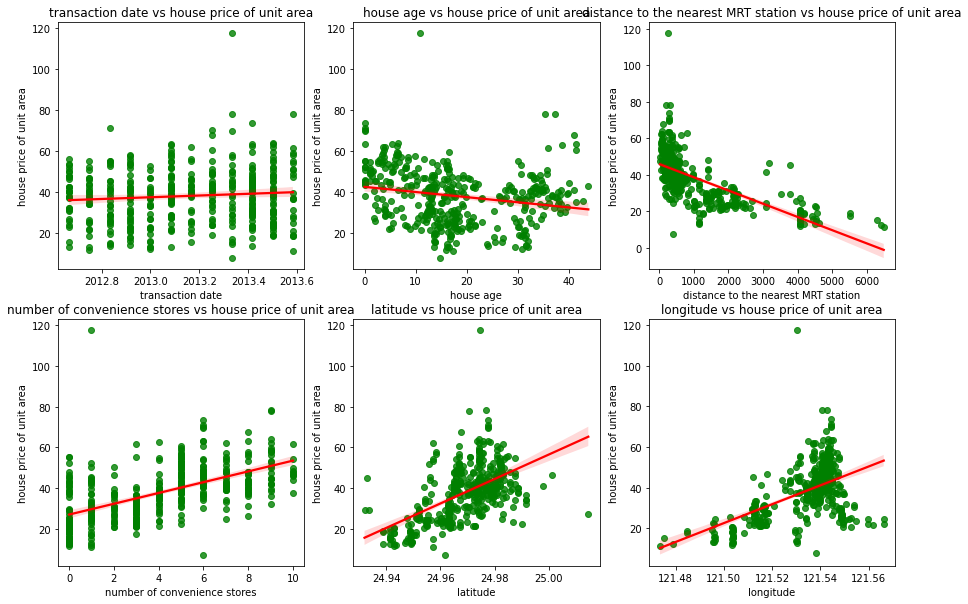

In [13]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(15,10))
for key,col_name in enumerate(new_column_name[:-1]):
    # ax[key//3,key%3]
    sns.regplot(ax=ax[(key)//3,(key)%3],data=df,x=df[col_name], y=df[new_column_name[-1]],
                line_kws={'color':'red'},
                scatter_kws={'color':'g'})
    ax[key//3,key%3].set_title(f'{col_name} vs {new_column_name[-1]}')

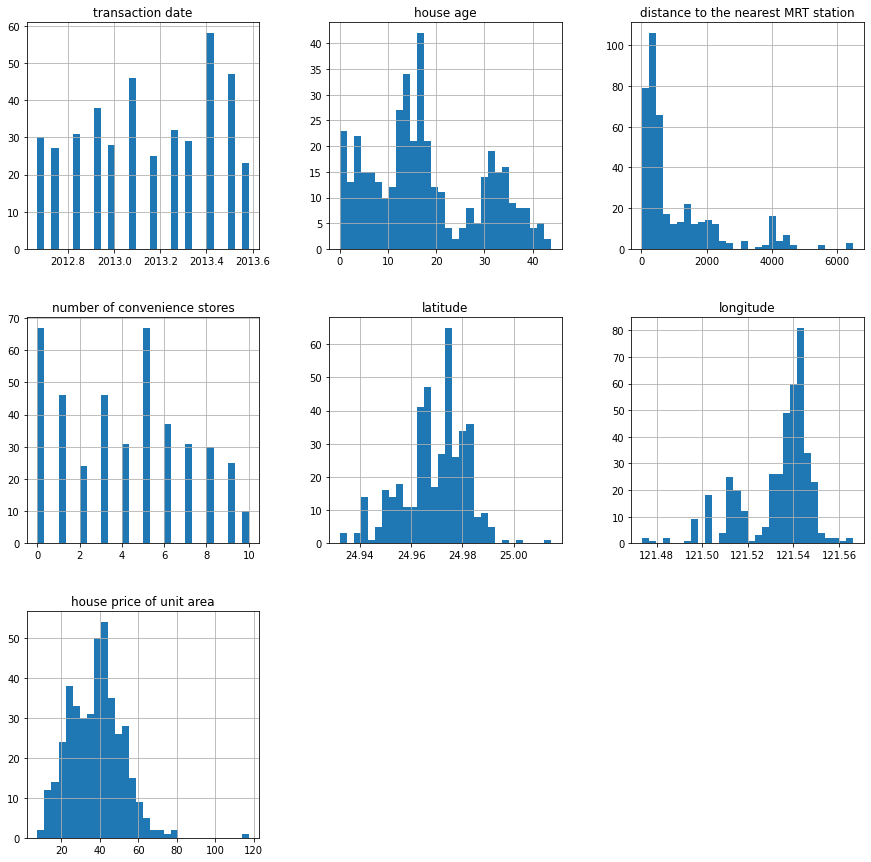

In [14]:
df[new_column_name].hist(bins=30, figsize=(15,15))
plt.show()

<p>1. transaction date vs target tidak memiliki korelasi yang signifikan, ditandakan dengan tidak ada distribusi data terlihat pada plot<br>
2. house age vs target memiliki sedikit korelasi, dilihat pada plot yang terdistribusi rata<br>
3. stasiun terdekat vs target memiliki korelasi yang tinggi dilihat pada distribusi positive skew ke arah kanan yang menandakan bahwa semakin jauh jarak stasiun, maka harga rumah yang terjual semakin menurun. Ini menandakan bahwa kebanyakan pembeli memilih untuk membeli rumah yang berdekatan dengan stasiun.<br>
4. banyak toko vs target terlihat memiliki hubungan linear yang stabil, dimana semakin banyak toko di dekat rumah, maka harga rumah semakin tinggi.<br>
5. pada latitude dan longitude tertentu terbentuk sebuah cluster yang menandakan bahwa pada suatu rentang area tertentu, harga perumahan menjadi tinggi dikarenakan kemungkinan menjadi sebuah area strategis yang bagus untuk memiliki rumah sehingga harga cenderung tinggi.
</p>

In [15]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [16]:
df.drop(columns=['transaction date'], inplace=True)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from pycaret.regression import *
set_ = setup(df, target=df.columns[-1])

,Description,Value
0,Session id,4741
1,Target,house price of unit area
2,Target type,Regression
3,Original data shape,"(414, 6)"
4,Transformed data shape,"(414, 6)"
5,Transformed train set shape,"(289, 6)"
6,Transformed test set shape,"(125, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [19]:
best = compare_models()

In [20]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#Predict
# predictions = predict_model(best, data=) #data prediction

In [21]:
scaler = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [22]:
X_train.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,1.000000,0.005445,0.7,0.429350,0.719240
1,0.182648,0.349086,0.4,0.339312,0.422017
2,0.162100,0.342468,0.3,0.375424,0.410273
3,0.835616,0.074081,0.8,0.461464,0.765887
4,0.171233,0.098084,0.5,0.490911,0.801010


In [23]:
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=42))

sel_.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=42))

In [24]:
sel_.get_support()

array([ True,  True,  True,  True,  True])

<AxesSubplot:>

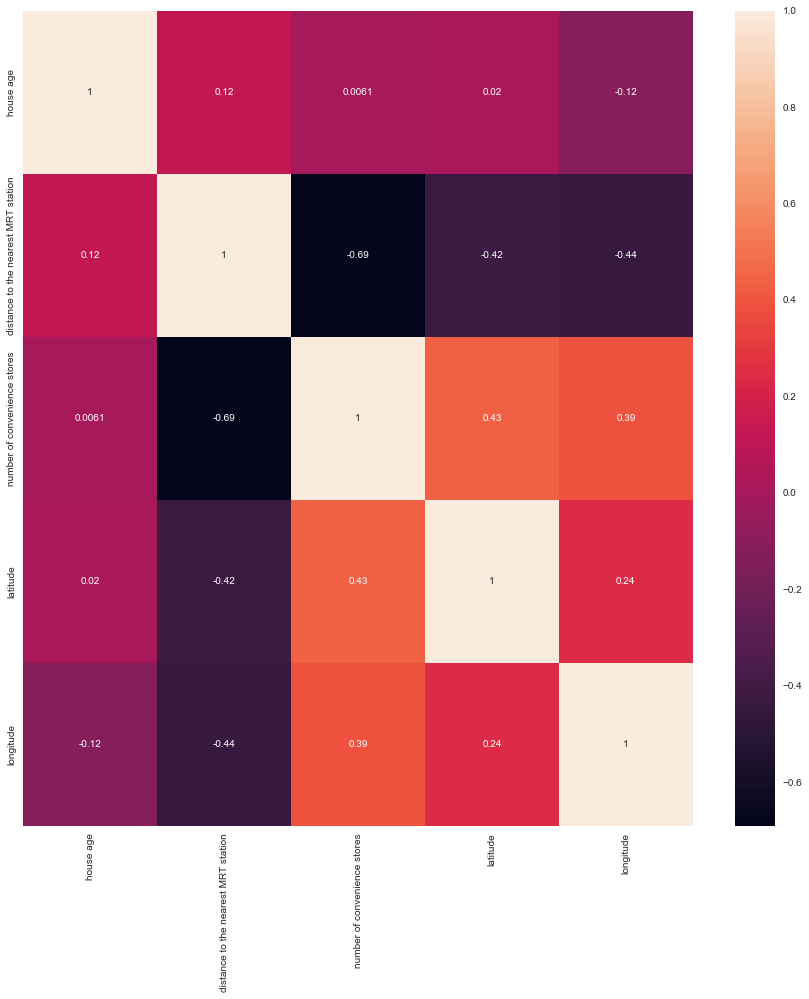

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(
    X_train.corr(method='spearman'),
    annot=True,
    fmt='.2g'
)

In [26]:
lin_model = Lasso(alpha=0.001, random_state=42)

lin_model.fit(X_train,y_train)

Lasso(alpha=0.001, random_state=42)

In [27]:
pred = lin_model.predict(X_train)
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

train mse: 3462384169882600721456136853627284001772300620019084075117477975521488499919862607344859250643959808
train rmse: 58842027241441985381799079716766340502732845088768
train r2: -0.003030303030303161



In [28]:
pred = lin_model.predict(X_test)
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

test mse: 168065093997208980783704800492294171330118148922802176
test rmse: 409957429493854894819377152
test r2: -0.026387837633630618

Average house price:  116888864240283232


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

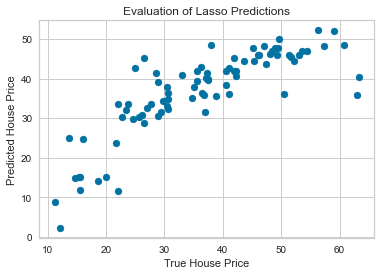

In [29]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [30]:
y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0     47.731935
1     41.949518
2     44.507741
3     41.306961
4     30.272328
        ...    
78    42.710575
79    31.920773
80    41.886442
81    46.065795
82    30.717206
Length: 83, dtype: float64

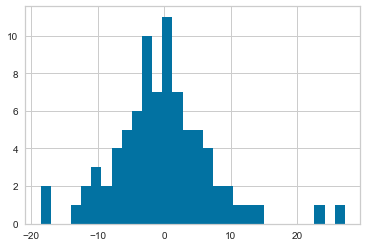

In [31]:
errors = y_test - preds
errors.hist(bins=30)
plt.show()

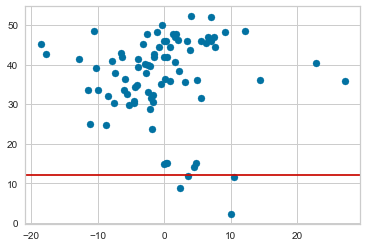

In [32]:
plt.scatter(errors,preds)
plt.axhline(y=12,color="r")

Text(0.5, 1.0, 'Feature Importance')

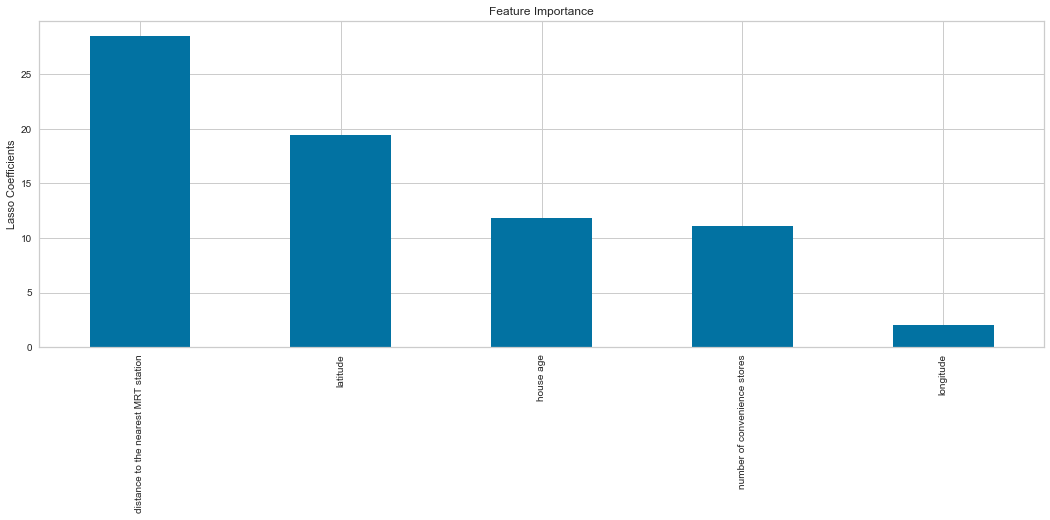

In [33]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')